In [1]:
import pandas as pd

In [4]:
import numpy as np

In [9]:
data=pd.read_csv("2021konya_yangin_istatistik.csv")

In [10]:
data=data.drop("_id",axis=1)
data.head()

,ilceler,elk._kontak,lpg_d.gaz_vb.,ocak_sob._kalo._kaz.,baca_tut.,sig._ve_kibr.,akary.,pat._madd.,yıld._dus.,sabotaj,diger,anlasılamadı,tplm
0,SELÇUKLU,71,0,23,12,381,1,3,0,21,126,8,646
1,MERAM,86,1,53,11,348,1,7,0,28,100,9,644
2,KARATAY,72,0,32,6,389,2,2,0,27,113,17,660
3,SANCAK,41,3,6,3,176,0,2,0,9,53,4,297
4,AKÖREN,2,1,2,2,4,0,0,0,0,8,16,35


In [12]:
data_sorted = data.sort_values(by='ilceler', ascending=True, inplace=True)
data.head()

,ilceler,elk._kontak,lpg_d.gaz_vb.,ocak_sob._kalo._kaz.,baca_tut.,sig._ve_kibr.,akary.,pat._madd.,yıld._dus.,sabotaj,diger,anlasılamadı,tplm
4,AKÖREN,2,1,2,2,4,0,0,0,0,8,16,35
5,AKŞEHİR,18,2,13,15,12,1,0,0,9,328,1,399
6,ALTINEKİN,11,0,5,0,19,0,0,0,1,10,8,54
7,BEYŞEHİR,6,4,10,11,138,0,0,0,5,75,229,478
8,BOZKIR,3,0,3,6,1,1,0,0,2,37,0,53


In [14]:
# Yanlış satırları tutmak için bir boole dizisi oluşturun
is_wrong = data.iloc[:, :-1].sum(axis=1, numeric_only=True) != data["tplm"]

In [15]:
wrong_rows = data[is_wrong]

In [17]:
if wrong_rows.empty:
    print("Tüm satırlar doğru.")
else:
    print("Yanlış satırlar:")
    print(wrong_rows)

Tüm satırlar doğru.


In [18]:
import matplotlib.pyplot as plt


In [19]:
# "ilceler" sütunundan ilçeleri alıp, "tplm" sütununda toplam yangın sayılarına göre gruplayalım
ilce_yangin_sayilari = data.groupby("ilceler")["tplm"].sum()

In [20]:
# En çok yangın çıkan ilçeyi ve yangın sayısını bulalım
en_cok_yangin_ilce = ilce_yangin_sayilari.idxmax()
en_cok_yangin_sayisi = ilce_yangin_sayilari.max()

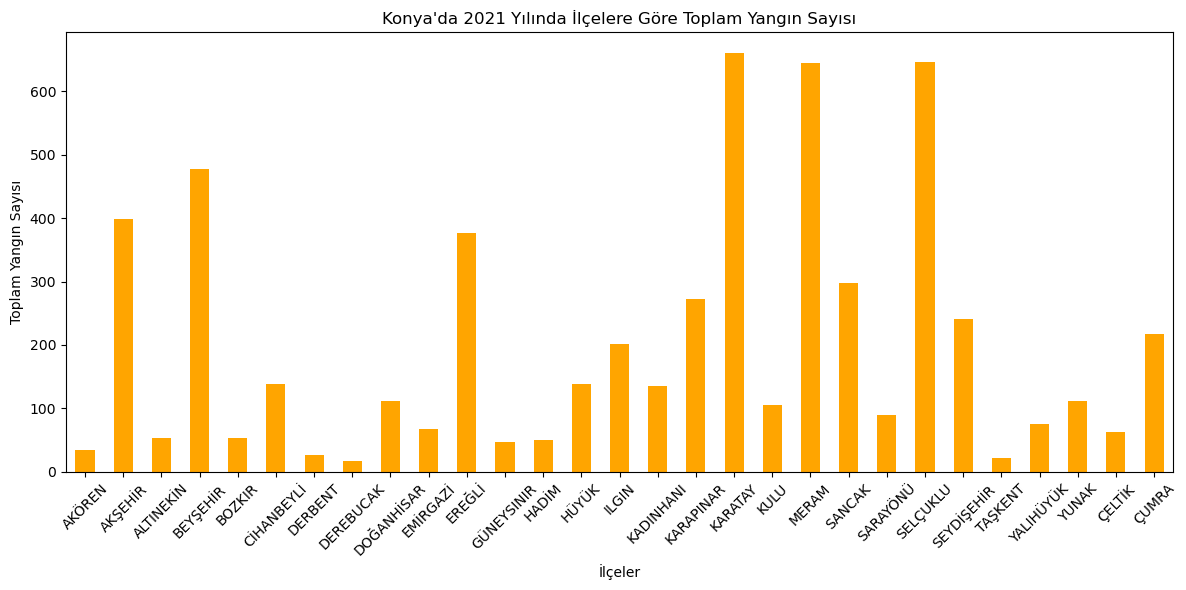

In [21]:
plt.figure(figsize=(12, 6))
ilce_yangin_sayilari.plot(kind="bar", color="orange")
plt.xlabel("İlçeler")
plt.ylabel("Toplam Yangın Sayısı")
plt.title("Konya'da 2021 Yılında İlçelere Göre Toplam Yangın Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()


In [49]:
print("En çok yangın çıkan ilçe:", en_cok_yangin_ilce)
print("Yangın sayısı:", en_cok_yangin_sayisi)

En çok yangın çıkan ilçe: KARATAY
Yangın sayısı: 660


In [45]:
yangin_sebepleri = data[["elk._kontak", "lpg_d.gaz_vb.", "ocak_sob._kalo._kaz.", "baca_tut.", "sig._ve_kibr.", "akary.", "pat._madd.", "yıld._dus.", "sabotaj", "diger", "anlasılamadı"]]

In [46]:
toplam_yangin_sebepleri = yangin_sebepleri.sum()

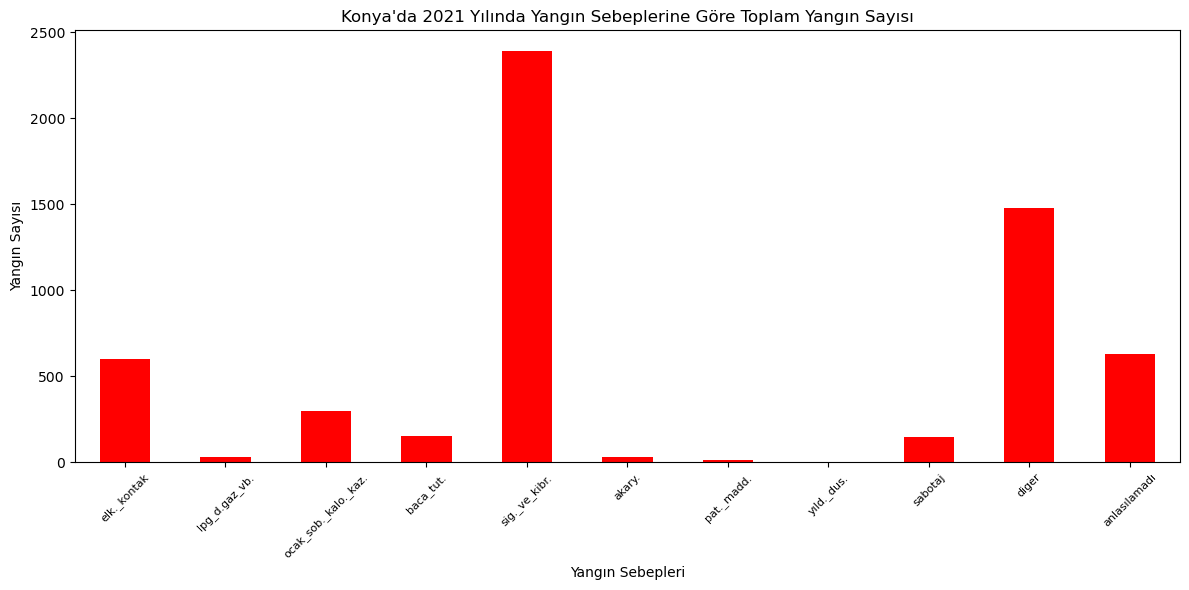

In [48]:
plt.figure(figsize=(12, 6))
toplam_yangin_sebepleri.plot(kind="bar", color="red")
plt.xlabel("Yangın Sebepleri")
plt.ylabel("Yangın Sayısı")
plt.title("Konya'da 2021 Yılında Yangın Sebeplerine Göre Toplam Yangın Sayısı")
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.tight_layout()

plt.show()